In [9]:
import pandas as pd
import numpy as np
import os
import sys 

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")

# calculate the average, median and standard deviation for each column
print(f"The average for each column is:\n{df.mean(numeric_only=True)}")
print(f"The median for each column is:\n{df.median(numeric_only=True)}")
print(f"The standard deviation for each column is:\n{df.std(numeric_only=True)}")

# calculate the seasonal average, median and standard deviation for each column
def season(dato):
    month=dato.month
    if month in [12,1,2]:
        return "Winter"
    elif month in [3,4,5]:
        return "Spring"
    elif month in [6,7,8]:
        return "Summer"
    elif month in [9,10,11]:
        return "Autumn"

df['season'] = df['Tid'].apply(season)
print(f"The average for each season is:\n{df.groupby('season').mean(numeric_only=True)}")
print(f"The median for each season is:\n{df.groupby('season').median(numeric_only=True)}")
print(f"The standard deviation for each season is:\n{df.groupby('season').std(numeric_only=True)}")




The average for each column is:
Makstemp         11.602115
Mintemp           4.153036
Middeltemp        7.617745
Snø               3.974116
Nedbør            2.423843
Middelvind        2.703982
Høye vindkast     5.564012
dtype: float64
The median for each column is:
Makstemp         11.4
Mintemp           3.6
Middeltemp        7.1
Snø               0.0
Nedbør            0.1
Middelvind        2.5
Høye vindkast     5.2
dtype: float64
The standard deviation for each column is:
Makstemp         9.050974
Mintemp          7.244604
Middeltemp       7.855064
Snø              9.927656
Nedbør           5.256624
Middelvind       1.134572
Høye vindkast    2.226089
dtype: float64


AttributeError: 'str' object has no attribute 'month'

In [1]:
from statistics import mode

#List of days with snow back to back, only those over X ammount of days.
def snowdays(grense=5):
	count=0
	snowdays=[]
	snowdays_dates=[]
	snow_period=()

	for i in range(len(df)-1):
		if df["Snø"][i] > 0:
			count += 1
		else:
			if count >= grense:                  #X ammont of days
				snowdays.append(count)
				end_date=pd.to_datetime(df["Tid"][i-1]).date()
				start_date=end_date-pd.Timedelta(days=count-1)
				snow_period=f"{start_date} --- {end_date}"
				snowdays_dates.append(snow_period)
			count=0

	print(f"Antall dager med snø etter en annen: {snowdays}")
	print(f"Typetall for antall dager med snø sammenhengende: {mode(snowdays)}\nMinste antall dager er {grense}")
	print(f"Dager med snø, datoer: {snowdays_dates}")

	
#List of days without rain back to back, only those over X ammount of days.
def drydays(grense=12):
	count=0
	no_rain_days=[]
	no_rain_dates=[]
	dry_period=()

	for i in range(len(df)-1):
		if df["Nedbør"][i] <= 0:
			count += 1
		else:
			if count >=grense:                             #X ammont of days
				no_rain_days.append(count)
				end_date=pd.to_datetime(df["Tid"][i-1]).date()
				start_date=end_date-pd.Timedelta(days=count-1)
				dry_period=f"{start_date} --- {end_date}"
				no_rain_dates.append(dry_period)
			count=0
			
	print(f"Antall dager med snø etter en annen: {no_rain_days}")
	print(f"Typetall for antall dager uten nedbør sammenhengende: {mode(no_rain_days)}\nMinste antall dager er {grense}")
	print (f"No rain dates: {no_rain_dates}")

snowdays(5)
drydays()


NameError: name 'df' is not defined

# Dataanalyse
Formålet med dataanlyse eller en såkalt statistisk analyse er å forstå datakvalitet og identifisere trender, og avdekke mønstre i datasettet som vil være til nytte for forståelse og innsikt i miljøforholdene over tid. De gir en rettesnor for fokus videre i visualisering av datene og den prediktive analysen. Deskriptiv statistikk er delt opp etter å finne middelverdi, spredning og "form" på datasettet.

Første steget er å beregne median, gjennomsnitt, typetall/module, standardavvik og varians. Median, gjenomsnitt og typetall er til for å sammenlignes og se om datasettet er skjevfordelt eller normalfordelt (symetrisk) og at median og gjennomsnitt bør være like. Standardavvik og varians vil si noe om spredning og hvor konsentrert datasettet er. Det må bli gjort opp en mening om man skal finne for hver dag, årstid eller år.

Neste steg er analyse av to eller flere variabler ved bruk av korrelasjoner som er basert på kvantitaiv argumentasjon for hvorfor de ikke bare kan værespuriøse sammenhenger.

Helt til slutt blir det fremstilt et histogram for å vise hyppigheten i de ulike kategoriene og alvorlighetsgraden av værdataene.

In [1]:
import pandas as pd
import numpy as np
import os
import sys 

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))

original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")

from modelling.data_analysis import DataAnalysis

import json

bins_path = os.path.join(os.getcwd(), "..", "data", "bins.json")
with open(bins_path, "r", encoding="utf-8") as f:
    bin_defs = json.load(f)


da = DataAnalysis(df, 'Makstemp', ['Snø', 'Nedbør'], {"Middelvind": 20.8,"Nedbør": 20.0}, bin_defs)

Vi vil se at snømengden vil avhenge av temperaturen og gå ned når temperaturen går opp. Korrelasjon viser styrken på sammenheng, dvs. hvor godt to ting "følger hverandre" med en gitt verdi mellom -1 og 1. 
- 1 = perfekt samsvar
- 0 = ingen sammenheng, 
- -1 = motsatt sammenheng.

          Makstemp       Snø    Nedbør
Makstemp  1.000000 -0.453526  0.045628
Snø      -0.453526  1.000000 -0.005860
Nedbør    0.045628 -0.005860  1.000000
           Makstemp        Snø     Nedbør
Makstemp  81.920127 -40.751591   2.170866
Snø      -40.751591  98.558349  -0.305805
Nedbør     2.170866  -0.305805  27.632093


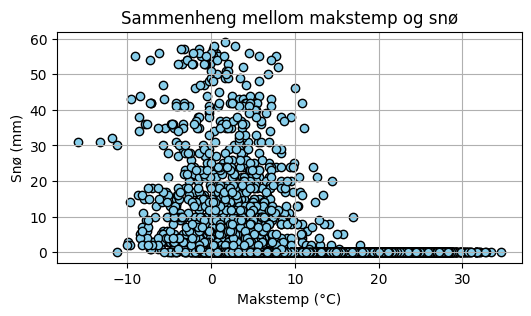

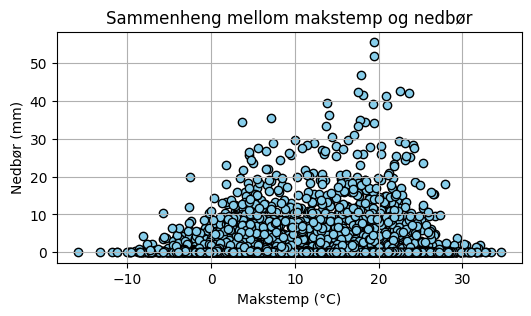

In [2]:
print(df[['Makstemp','Snø','Nedbør']].corr())
print(df[['Makstemp','Snø','Nedbør']].cov())

da.scatterplot()

For den siste delen vil det være mulig å se nyansenene som hvor vanlig det er med høye/lave verdier for målingene. Med tanke på at snø er avhengig av årstid og fungerer kortere enn et halvt år (derav manglende data) så plukkes det kun de verdiene fra første dag med snø innen vintersesongen startet til siste dag med snø innen vintersesongens slutt.

Grenser er hentet 14.april 2025 fra https://www.met.no/vaer-og-klima/begreper-i-vaervarsling 

**Merk!** Nedbør har for siste 24 timene, men kun 1 time for styrtregn. Vind er i m/s

### Kategorier for Nedbør

| Kategori                  | Nedre grense (mm) | Øvre grense (mm) |
|---------------------------|-------------------|------------------|
| Oppholdsvær              | 0.0               | 0.0              |
| Stort sett oppholdsvær   | 0.0001            | 0.4              |
| Lette/enkelte byger      | 0.5               | 2.0              |
| Regn, sludd, snø, byger  | 2.1               | 20.0             |
| Tildels store mengder    | 20.1              | 100.0            |
| Styrtregn                | 100.1             | 200.0            |

---

### Kategorier for Middelvind

| Kategori         | Nedre grense (m/s) | Øvre grense (m/s) |
|------------------|--------------------|-------------------|
| Stille           | 0.0                | 0.2               |
| Flau vind        | 0.3                | 1.5               |
| Svak vind        | 1.6                | 3.3               |
| Lett bris        | 3.4                | 5.4               |
| Laber bris       | 5.5                | 7.9               |
| Frisk bris       | 8.0                | 10.7              |
| Liten kuling     | 10.8               | 13.8              |
| Stiv kuling      | 13.9               | 17.1              |
| Sterk kuling     | 17.2               | 20.7              |
| Liten storm      | 20.8               | 24.4              |
| Full storm       | 24.5               | 28.4              |
| Sterk storm      | 28.5               | 32.6              |
| Orkan            | 32.7               | 200.0             |


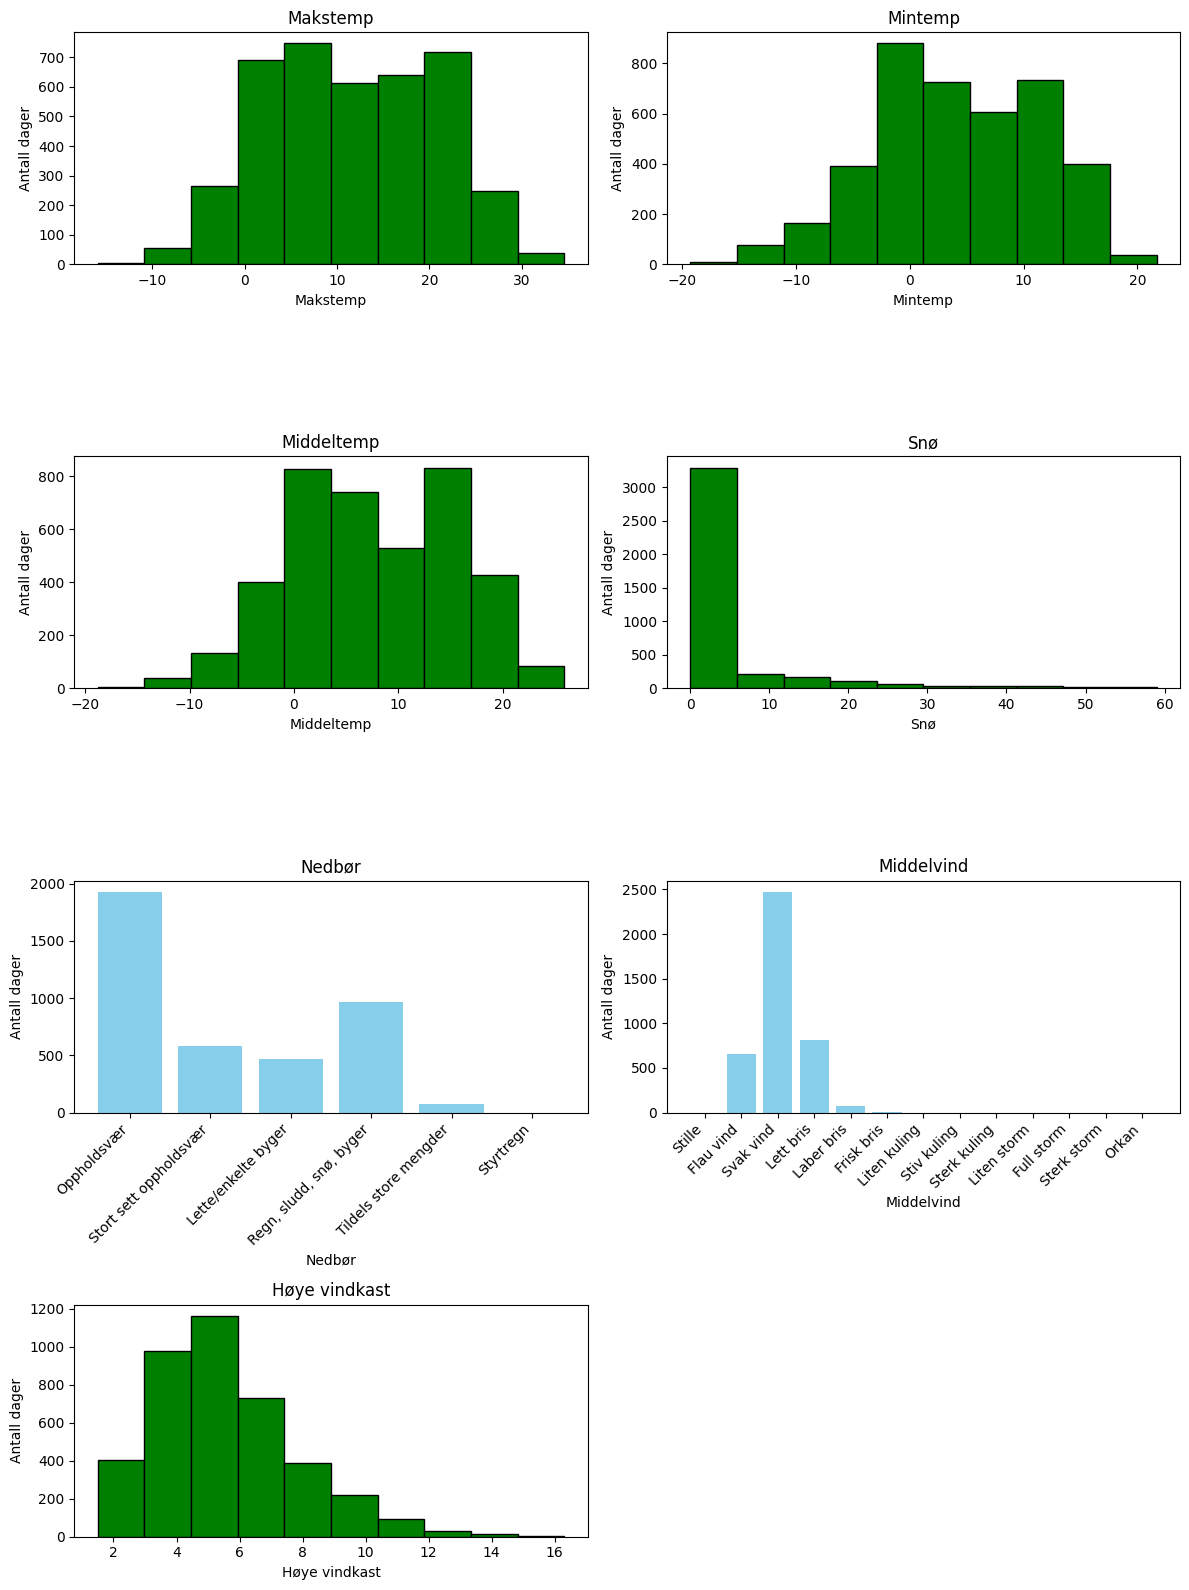

In [3]:
da.df_hist(df)

Som et tillegg kommer det plott av værdatene for å visuelt se om det er neoen sammenheng eller økning fra år til år. Pluss at det tas hensyn til at det er kortidsvarsler det er snakk om og ikke de siste 3-, 7- eller 30 dagene, som i utgangspunktet vil være gunstig med tanke på varsling av store nedbørsmengder.

In [4]:
da.years_max()

,Tid,Makstemp,Mintemp,Middeltemp,Snø,Nedbør,Middelvind,Høye vindkast
Tid,,,,,,,,
2014,2014,33.4,19.9,25.4,31.0,33.3,7.5,14.1
2015,2015,27.0,16.8,20.9,28.0,55.6,6.5,12.7
2016,2016,29.1,17.1,22.6,20.0,27.0,6.9,13.4
2017,2017,27.3,15.7,20.4,23.0,42.2,8.0,14.4
2018,2018,34.6,21.7,25.9,59.0,41.5,8.1,14.4
2019,2019,31.7,21.5,25.3,49.0,39.6,7.1,11.8
2020,2020,30.9,19.5,24.6,15.0,47.0,8.4,16.3
2021,2021,30.2,20.1,23.6,24.0,39.0,7.7,14.6
2022,2022,28.5,18.4,22.6,24.0,28.8,6.9,14.4


In [5]:
resultat = da.years_severity()

print(resultat)

print('\nGrensene som ble brukt:')
for k, v in da.limits.items():
    print(f"- {k}: {v:.2f}")



      Middelvind  Nedbør  Makstemp  Mintemp  Middeltemp  Snø  Høye vindkast
Tid                                                                        
2014           0       5        28        0           9    1             79
2015           0       7         5        0           0    0             76
2016           0       4        12        0           2    0             86
2017           0       6         4        0           0    0             70
2018           0       5        56        1          19   84             66
2019           0       7        17        2           4   20             79
2020           0      14        26        0           5    0             82
2021           0       4        24        0           3    0             60
2022           0       6        16        0           1    0             58
2023           0       9        18        0           4    7             58
2024           0       6        15        0           1   55             58

Grensene so

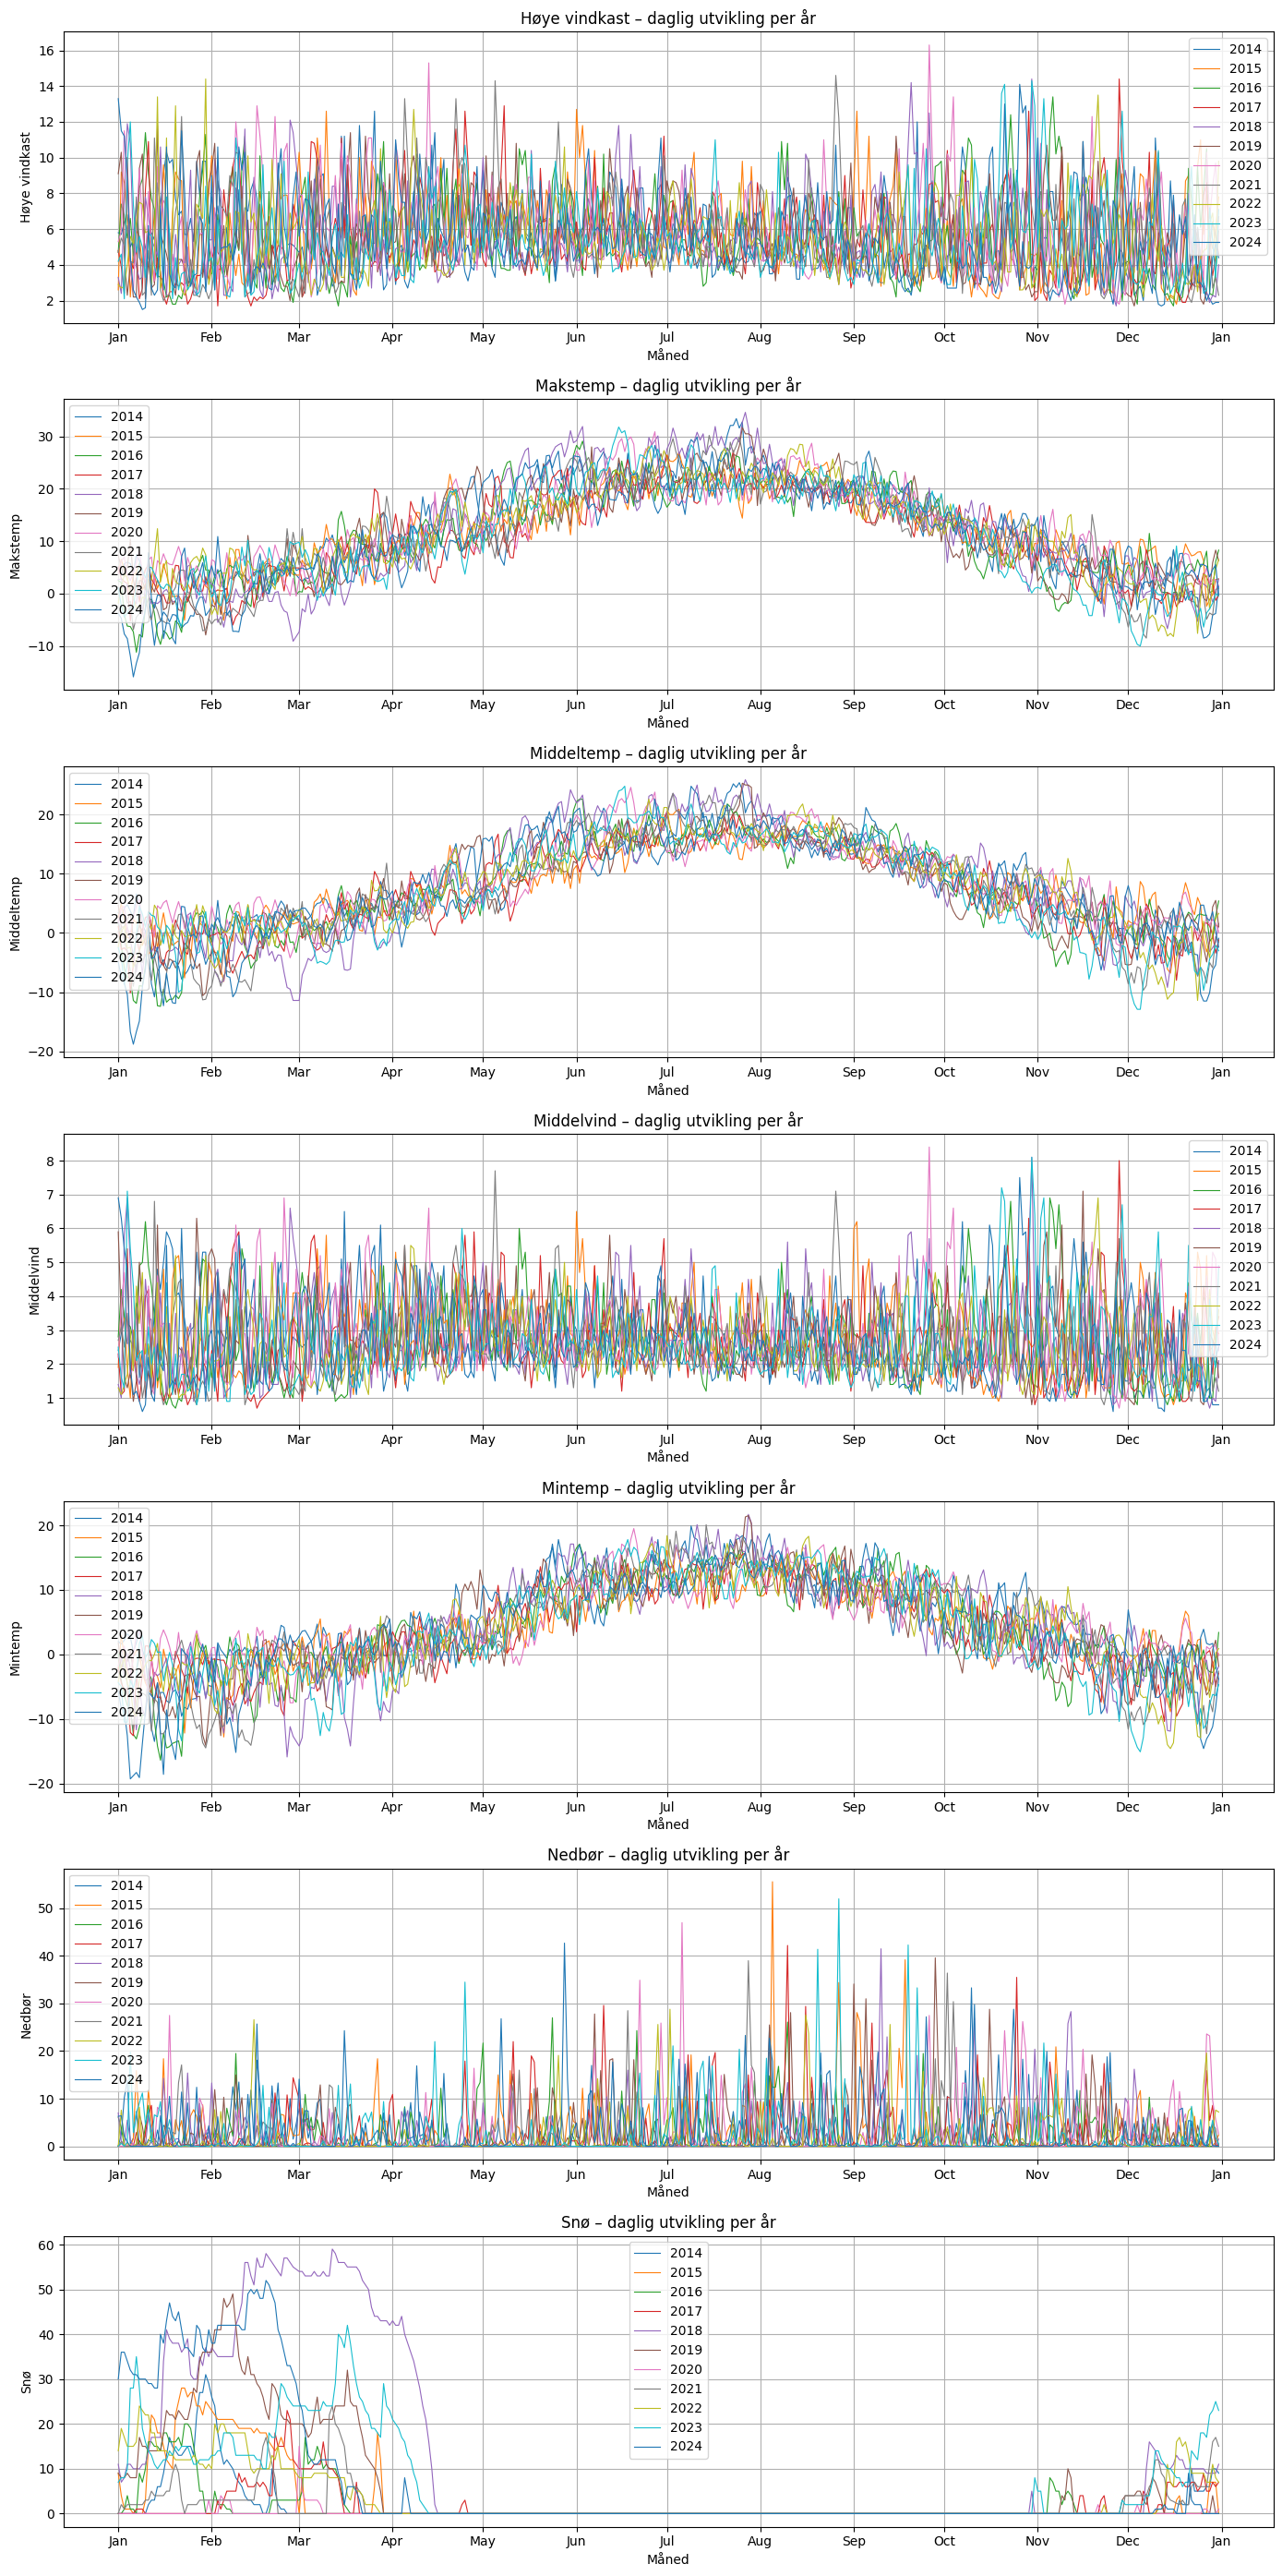

In [3]:
da.years_averageplot(df)